In [436]:
import numpy as np
import matplotlib.pyplot as plt

In [437]:
def covariance(x, y:np.array)->float:
    x_dev = x - x.mean()
    y_dev = y - y.mean()
    cov = (x_dev*y_dev).mean()
    return cov

def pierce_coeff(x, y:np.array) -> float:
    return covariance(x, y) / (x.std() * y.std())

def linear_params(x, y:np.array) -> tuple[float, float, float]:
    x_offset = x.mean()
    y_offset = y.mean()
    a = pierce_coeff(x, y) * y.std()/x.std()
    return x_offset, y_offset, a

In [438]:
size = 1000
a = np.random.normal(size=size)
b = np.random.normal(0, 4, size)

In [439]:
b2 = a + .1*b

In [440]:
pierce_coeff(a, b2)

0.9232341512934691

In [441]:
def create_line(x, y:np.array) -> list[tuple, tuple]:
    x_off, y_off, koef = linear_params(x, y)
    line = []
    line.append((x_off - 10, y_off - 10*koef))
    line.append((x_off + 10, y_off + 10*koef))
    return line

In [442]:
def draw_canvas(x, y: np.array , line:list[tuple, tuple]):
    line = np.array(line).T
    plt.figure(figsize=(4,4))
    plt.plot(x, y, 'o')
    plt.plot(line[0], line[1])
    axis = 10
    plt.axis([-axis, axis, -axis, axis])

    plt.show()
    return True

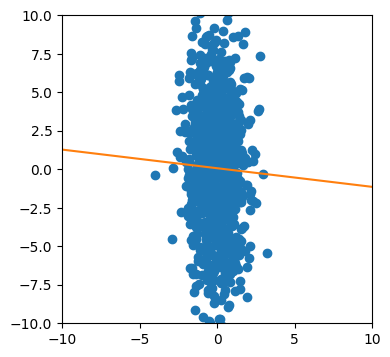

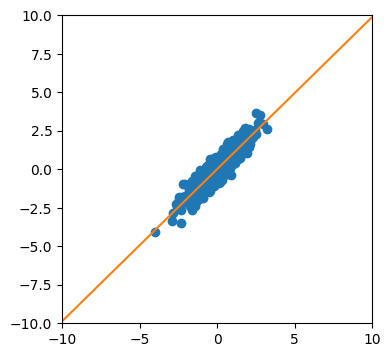

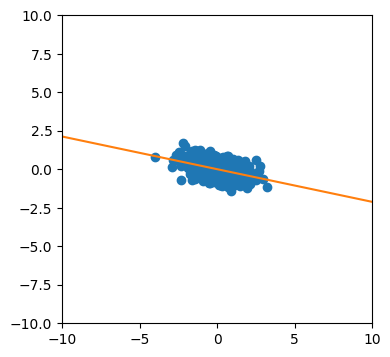

True

In [443]:
draw_canvas(a, b, create_line(a, b))

draw_canvas(a, b2, create_line(a, b2))

b3 = -a*.2 + .1*b
draw_canvas(a, b3, create_line(a, b3))

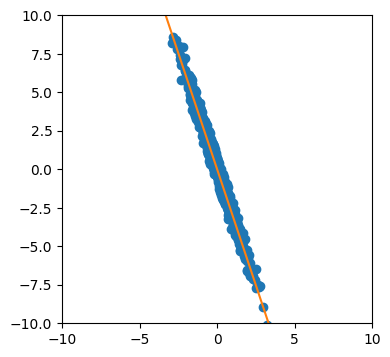

True

In [444]:
b3 = -a*3 + .1*b
draw_canvas(a, b3, create_line(a, b3))

In [445]:
def rot_matrix(angle):
    angle = angle* np.pi/180
    rotation_matrix = np.array(
        [[np.cos(angle), -np.sin(angle)],
         [np.sin(angle), np.cos(angle)]]
    )
    return rotation_matrix

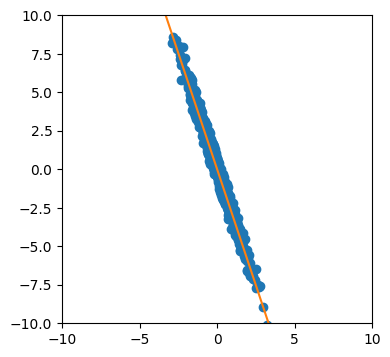

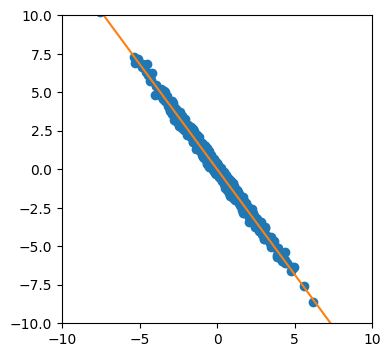

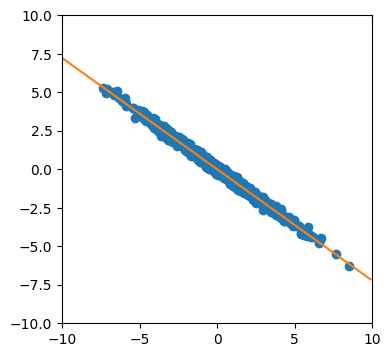

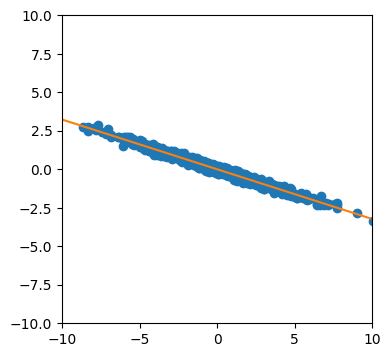

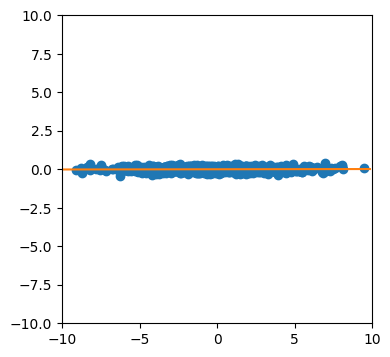

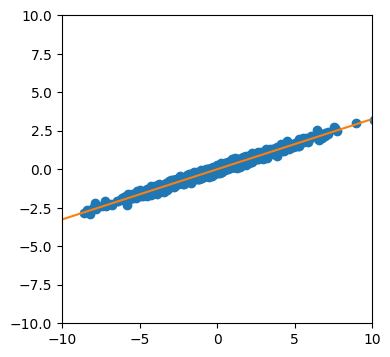

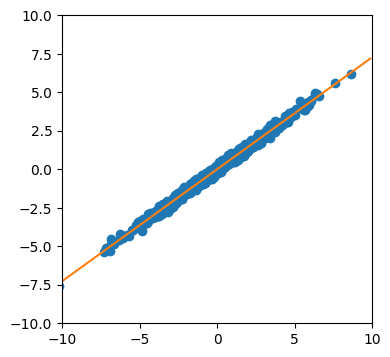

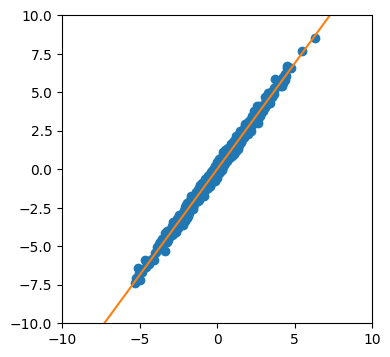

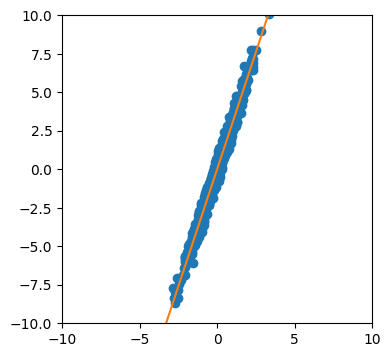

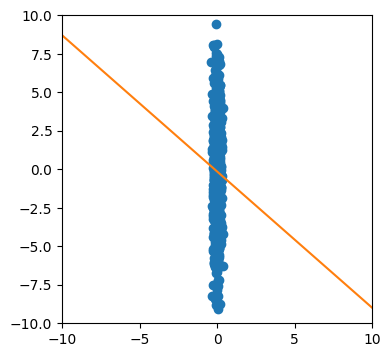

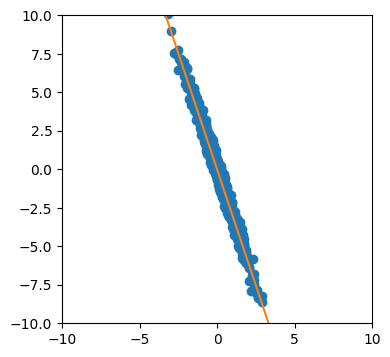

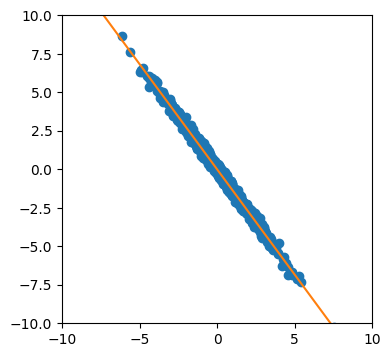

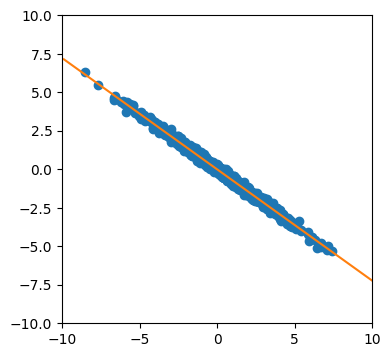

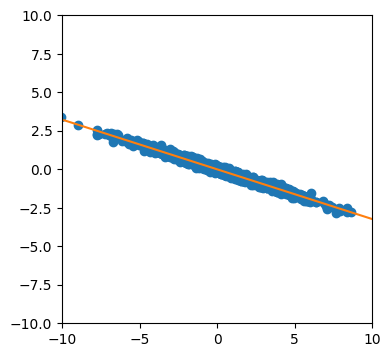

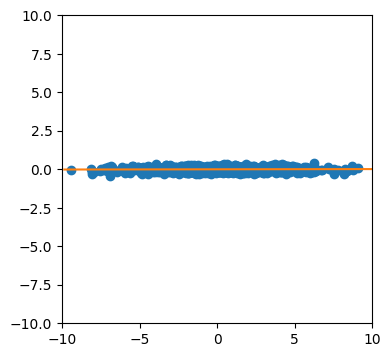

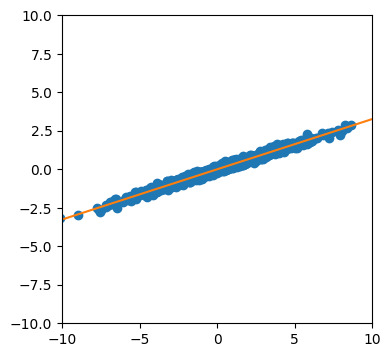

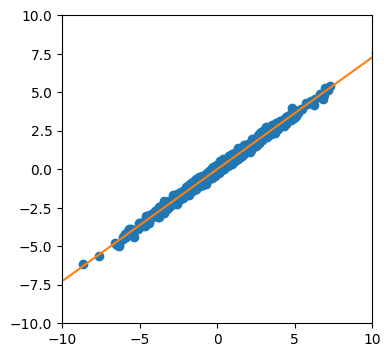

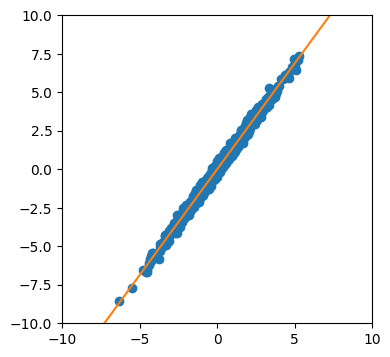

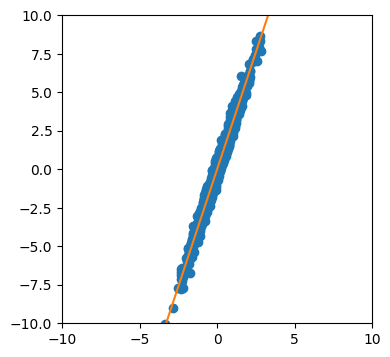

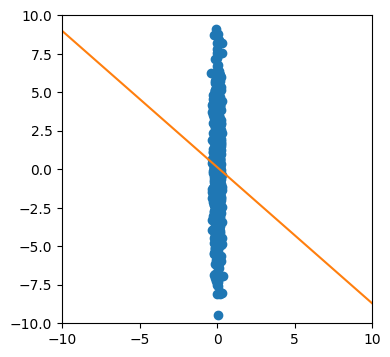

In [448]:
samples = np.array([a, b3])

for i in range(0, 360, 18):
    rotation_matrix = rot_matrix(i)
    samples_rot = rotation_matrix.dot(samples)
    draw_canvas(samples_rot[0], samples_rot[1], create_line(samples_rot[0], samples_rot[1]))